# Magic and loading data

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt

%matplotlib inline

In [54]:
# runtime needs to be restarted after running this cell

!pip install arch yfinance pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
from pmdarima.arima import ADFTest
from pmdarima.arima import auto_arima

In [56]:
# importing data

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
data = pd.read_excel('/content/drive/MyDrive/07 - Six - Team only/Raw data copy/Time_Series_Merchants_Transactions_Anonymized.xlsx',)

# Exploratory Data Analysis

## DataFrame formatting

In [58]:
# replacing index

data = data.set_index('Merchant Name')

In [59]:
# replacing columns names with standard date format

dates = pd.date_range(start='2020-08', end='2022-10', freq="M")
data.columns = dates

In [60]:
data.head()

,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
Merchant Name,,,,,,,,,,,,,,,,,,,,,
Merchant 1,416772.0,395324.0,411329.0,475679.0,497747.0,445429.0,505033.0,477349.0,496073.0,576800.0,...,644293.0,700144.0,611675.0,639038.0,616915.0,686572.0,630707.0,622073.0,667523.0,668189.0
Merchant 2,21.0,24.0,13.0,21.0,4.0,80.0,1.0,24.0,183.0,31.0,...,11.0,119.0,62.0,52.0,432.0,86.0,108.0,72.0,101.0,80.0
Merchant 3,1.0,1.0,0.0,0.0,50.0,3.0,4.0,4.0,0.0,16.0,...,50.0,0.0,0.0,0.0,0.0,0.0,49.0,1.0,1.0,0.0
Merchant 4,159.0,168.0,155.0,152.0,160.0,149.0,147.0,152.0,170.0,150.0,...,175.0,159.0,180.0,162.0,183.0,172.0,198.0,183.0,226.0,185.0
Merchant 5,70.0,27.0,60.0,63.0,80.0,57.0,75.0,73.0,85.0,96.0,...,132.0,147.0,129.0,127.0,131.0,159.0,150.0,160.0,154.0,168.0


In [61]:
data.shape

(1913, 26)

## Total sum by month

In [62]:
# adding total

data.loc['total'] = data.sum()
data.tail()

,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
Merchant Name,,,,,,,,,,,,,,,,,,,,,
Merchant 1910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
Merchant 1911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Merchant 1912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Merchant 1913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
total,5983120.0,5566534.0,5730157.0,6141497.0,7070023.0,6470676.0,6376336.0,6395341.0,6092995.0,6819962.0,...,8402646.0,7843850.0,7574393.0,7370176.0,7186898.0,8664142.0,7156954.0,7421947.0,7867331.0,7710690.0


In [63]:
data.shape

(1914, 26)

In [64]:
data.loc['total'][0]

5983120.0

In [65]:
df = pd.DataFrame(data.loc['total'].T)
df.index.name = 'Month'
df.head()

,total
Month,
2020-08-31,5983120.0
2020-09-30,5566534.0
2020-10-31,5730157.0
2020-11-30,6141497.0
2020-12-31,7070023.0


# SUM data to use

In [66]:
# SUM = sum of all merchants

df.head()

,total
Month,
2020-08-31,5983120.0
2020-09-30,5566534.0
2020-10-31,5730157.0
2020-11-30,6141497.0
2020-12-31,7070023.0


# SUM ADFTest Autoregression

## Non-stationary

In [67]:
def test_stationarity(time_series):
  movingAVG = time_series.rolling(window=12).mean()
  movingSTD = time_series.rolling(window=12).std()
  orig = plt.plot(time_series, color='black', label='Original')
  mean = plt.plot(movingAVG, color='red', label='Mean')
  std = plt.plot(movingSTD, color='blue', label='Std')
  plt.legend(loc='best')
  plt.title('Rolling mean and STD')
  plt.show(block=False)

  print('Results of Dicky-Fuller Test:')
  dftest = adfuller(time_series, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test statistics', 'p-value', '#lag used', 'n. observations used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)

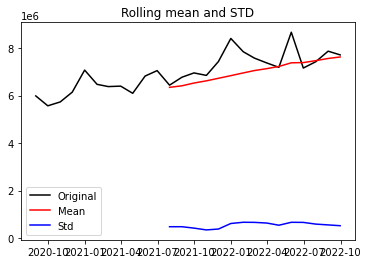

Results of Dicky-Fuller Test:
Test statistics         -2.181811
p-value                  0.212913
#lag used                0.000000
n. observations used    25.000000
Critical Value (1%)     -3.723863
Critical Value (5%)     -2.986489
Critical Value (10%)    -2.632800
dtype: float64


In [68]:
test_stationarity(df)

# H => data is not stationary
# Ha => data is stationary

# test statistics > critical values => failed to reject the null hypothesis
# data is non-stationary

In [69]:
# check for autoregressive time series model

adft = ADFTest()
adft.is_stationary(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: is_stationary is deprecated and will be removed in a future release of pmdarima. Use should_diff instead.
  after removing the cwd from sys.path.


(0.26812698256246603, True)

In [70]:
adft.should_diff(df)

(0.26812698256246603, True)

# SUM Autoregressive integrated moving average models w/ auto-ARIMA

## ARIMA

In [71]:
# p = number of lag observations included in the model
# d = number of times that the raw observation are differenced
# q = size of moving average window (order of moving average)

In [72]:
# ARIMA model setup

ARIMA_model = auto_arima(df, 
                      start_p=1, 
                      start_q=1,
                      test='adf',             # automatic optimal d through adftest
                      max_p=3, max_q=3,       # max p and q
                      m=12,                   # period of seasonal differencing (monthly=12)
                                              # frequency of series (if m==1, seasonal is set to FALSE automatically)
                      d=None,                 # automatic optimal 'd' from model
                      seasonal=False,         # no Seasonality for standard ARIMA
                      trace=False,            # logs 
                      error_action='warn',    # shows errors ('ignore' silences these)
                      suppress_warnings=True,
                      stepwise=True)          # identifies optimal model parameters

/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


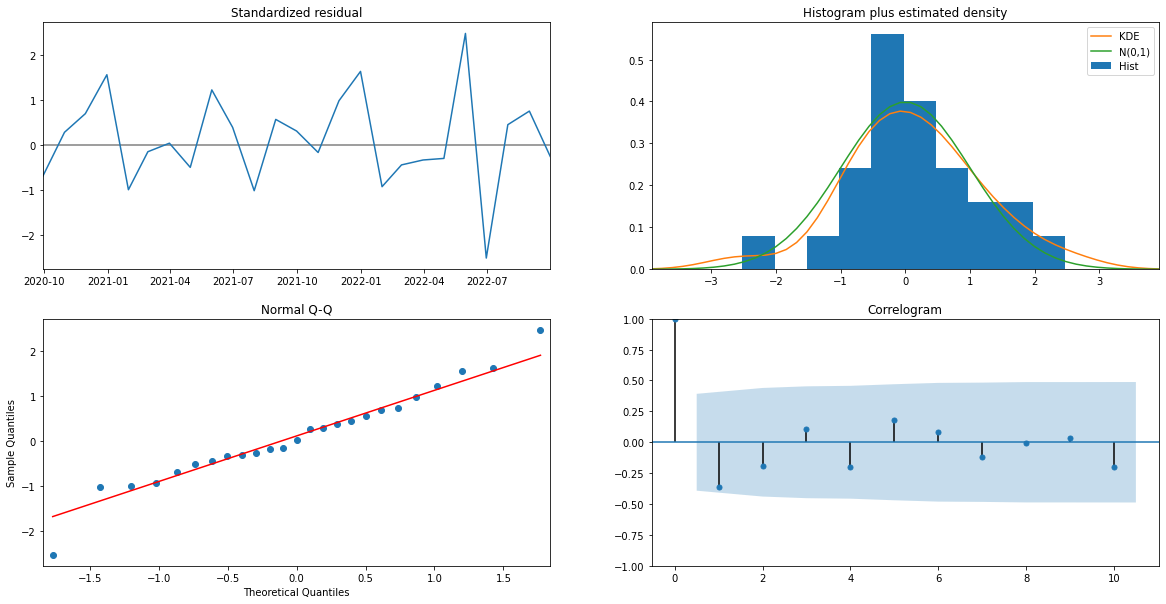

In [73]:
# ARIMA model diagnostics

ARIMA_model.plot_diagnostics(figsize=(20,10))
plt.show()

In [74]:
# ARIMA model summary

ARIMA_model.summary()

# for SUM p-value < 0.05 => significant

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   26
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -368.505
Date:                Tue, 22 Nov 2022   AIC                            739.009
Time:                        11:20:18   BIC                            740.228
Sample:                    08-31-2020   HQIC                           739.348
                         - 09-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.575e+11   8.52e+10      4.197      0.000    1.91e+11    5.24e+11
===================================================================================
Ljung-Box (L1) (Q):                   3.62   Jarque-Bera (JB):                 0.45
Prob(Q):                              0.06   Prob(JB):                         0.80
Heteroskedasticity (H):               2.89   Skew:                            -0.06
Prob(H) (two-sided):                  0.15   Kurtosis:                         3.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

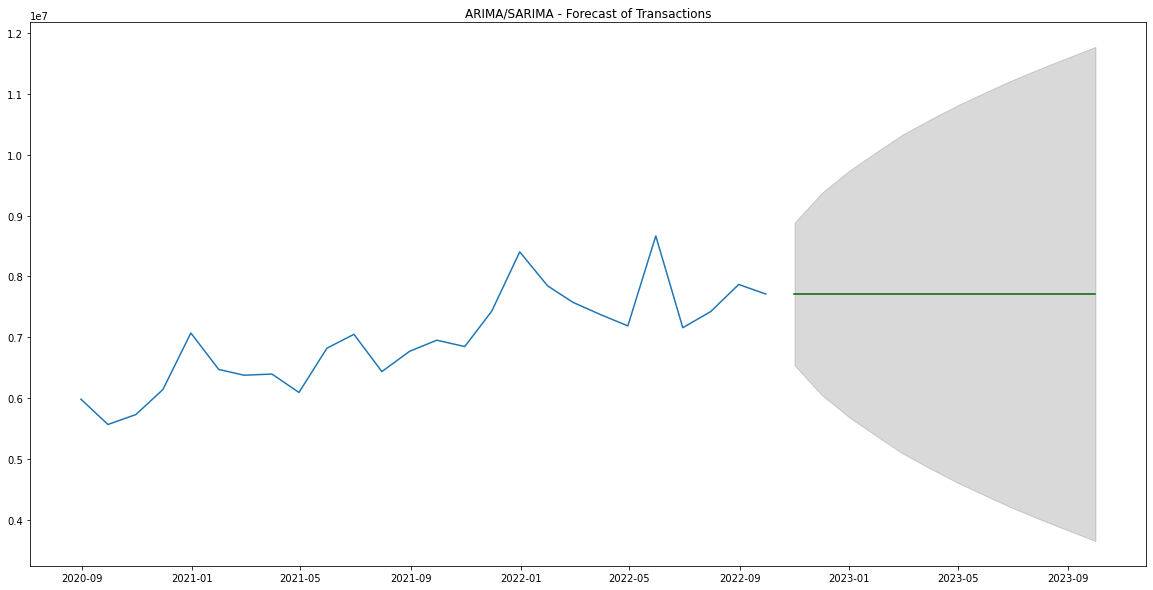

In [75]:
# forecasting for n periods

def forecast(ARIMA_model, periods=12):

    # forecast
    n_periods = periods
    fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = pd.date_range(df.index[-1] + pd.DateOffset(months=1), periods = n_periods, freq='MS')
    
    # make series for plotting purpose
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # plot
    plt.figure(figsize=(20,10))
    plt.plot(df, color='#1f76b4')
    plt.plot(fitted, color='darkgreen')
    plt.fill_between(lower_series.index, 
                    lower_series, 
                    upper_series, 
                    color='k', alpha=.15)

    plt.title("ARIMA/SARIMA - Forecast of Transactions")
    plt.show()

forecast(ARIMA_model)

## SARIMA

In [76]:
# ARIMA with seasonal=True
# SARIMA model setup

SARIMA_model = auto_arima(df['total'], 
                      start_p=1,              # order of the autoreg (n. lags) of the model
                      start_q=1,
                      start_P=0,              # order of the autoreg portion of the seasonal model
                      test='adf',             
                      max_p=3, max_q=3,       
                      m=12,                   # period of seasonal differencing (monthly=12)
                                              # frequency of series (if m==1, seasonal is set to FALSE automatically)
                      d=None,                 # automatic
                      D=1,                    # order of the seasonal differencing
                      seasonal=True,          # introducing seasonality
                      trace=False,             
                      error_action='warn',    
                      suppress_warnings=True,
                      stepwise=True)          # identifies optimal model parameters

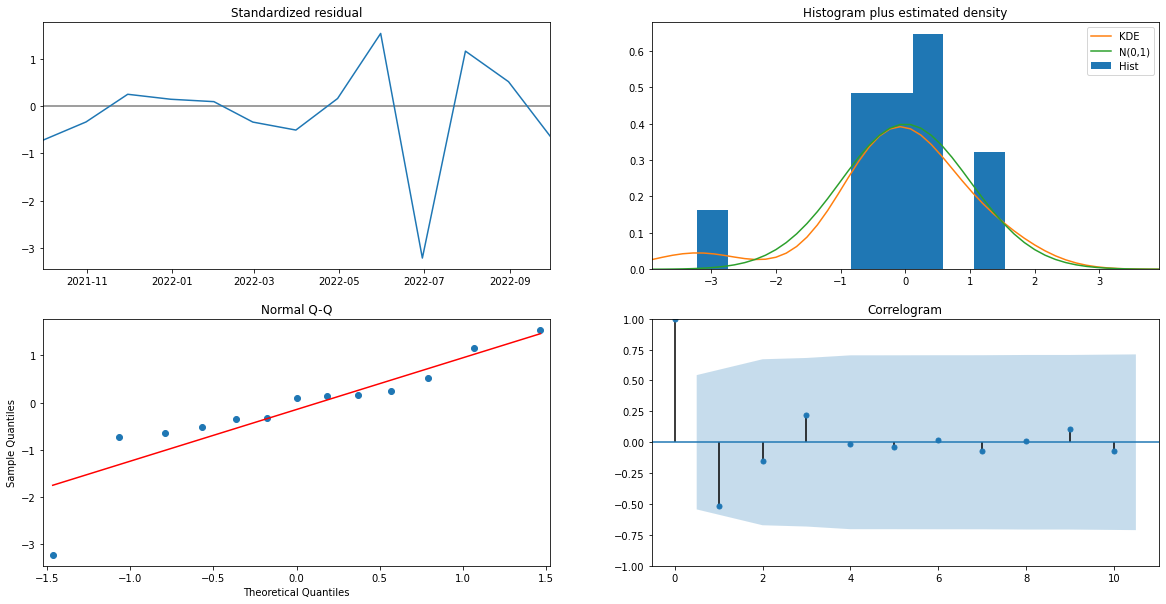

In [77]:
# SARIMA model diagnostics

SARIMA_model.plot_diagnostics(figsize=(20,10))
plt.show()

In [78]:
# SARIMA model summary

SARIMA_model.summary()

# for SUM p-value > 0.05 => not significant

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   26
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -190.477
Date:                            Tue, 22 Nov 2022   AIC                            384.954
Time:                                    11:20:21   BIC                            386.084
Sample:                                08-31-2020   HQIC                           384.722
                                     - 09-30-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1695      0.097     -1.756      0.079      -0.359       0.020
sigma2      2.498e+11   9.06e-14   2.76e+24      0.000     2.5e+11     2.5e+11
===================================================================================
Ljung-Box (L1) (Q):                   4.28   Jarque-Bera (JB):                 6.61
Prob(Q):                              0.04   Prob(JB):                         0.04
Heteroskedasticity (H):              17.31   Skew:                            -1.28
Prob(H) (two-sided):                  0.02   Kurtosis:                         5.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.25e+39. Standard errors may be unstable.
"""

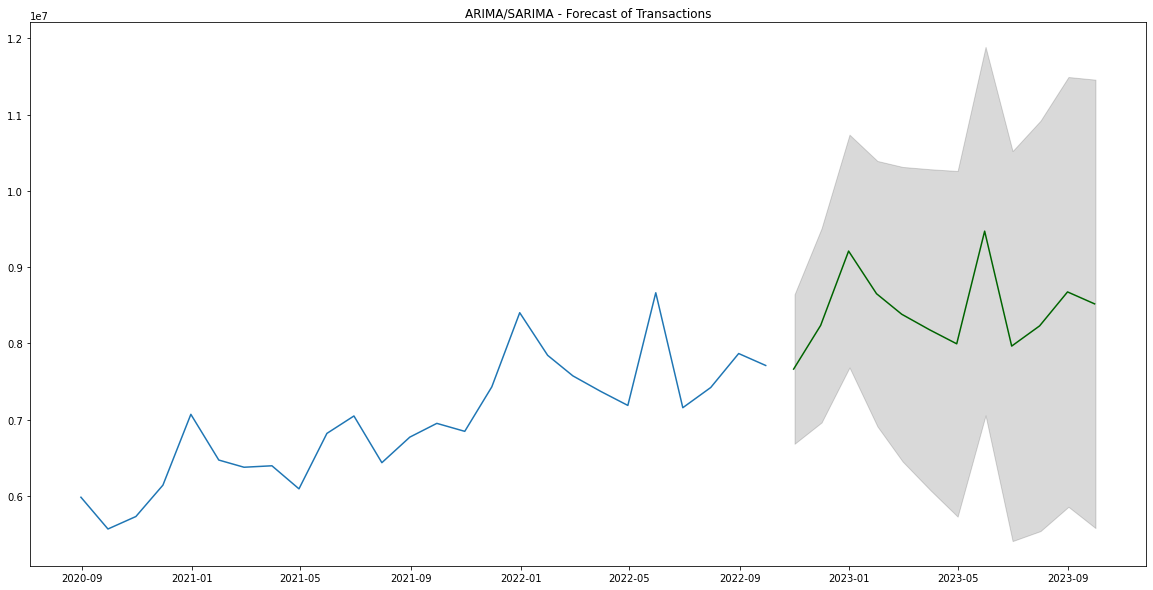

In [79]:
# forecasting for n periods
# n = 12

forecast(SARIMA_model)

## SARIMAX

In [80]:
# ARIMA uses loop and grid search for optimal values of p, d, q
# SARIMAX does the same +
# using nested loop and grid search for the seasonal values of p, d, q

In [81]:
# to forecast multiple timesteps into the future
# we need to include the months as an exogenous variable to be forecasted as well

df['month_index'] = df.index.month

In [82]:
df['month_index'][:13]

Month
2020-08-31     8
2020-09-30     9
2020-10-31    10
2020-11-30    11
2020-12-31    12
2021-01-31     1
2021-02-28     2
2021-03-31     3
2021-04-30     4
2021-05-31     5
2021-06-30     6
2021-07-31     7
2021-08-31     8
Freq: M, Name: month_index, dtype: int64

In [83]:
# SARIMAX model setup

SARIMAX_model = auto_arima(df[['total']], 
                           exogenous=df[['month_index']],
                           start_p=1, 
                           start_q=1,
                           test='adf',
                           max_p=3, max_q=3, 
                           m=12,
                           start_P=0, 
                           seasonal=True,
                           d=None, 
                           D=1, 
                           trace=False,
                           error_action='warn',  
                           suppress_warnings=True, 
                           stepwise=True)

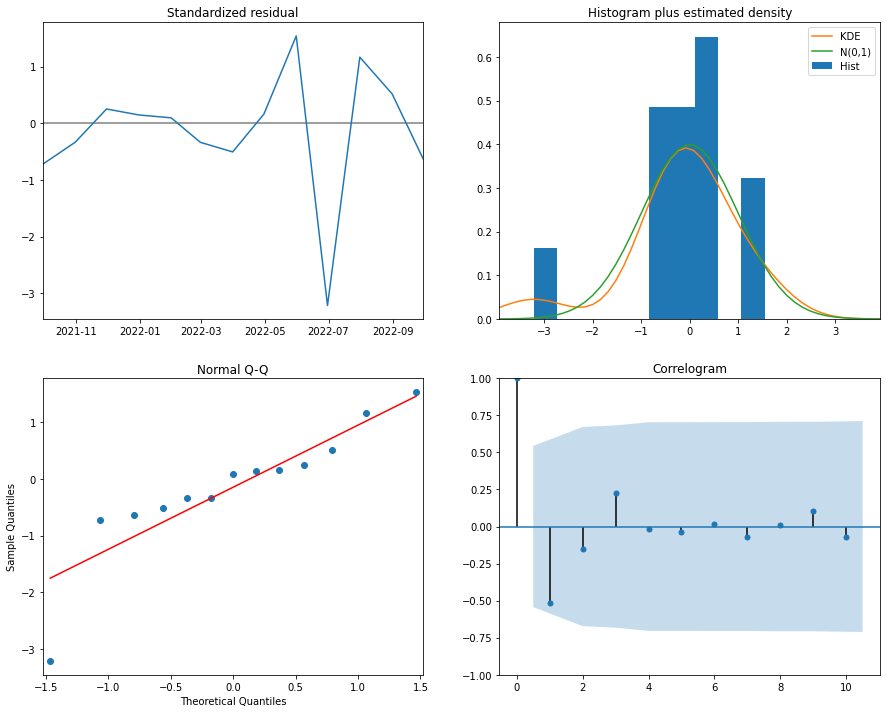

In [84]:
# SARIMAX model diagnostics

SARIMAX_model.plot_diagnostics(figsize=(15,12))
plt.show()

In [85]:
# SARIMAX model summary

SARIMAX_model.summary()

# for SUM p-value > 0.05 => not significant

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   26
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -190.477
Date:                            Tue, 22 Nov 2022   AIC                            384.954
Time:                                    11:20:23   BIC                            386.084
Sample:                                08-31-2020   HQIC                           384.722
                                     - 09-30-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1695      0.097     -1.756      0.079      -0.359       0.020
sigma2      2.498e+11   9.06e-14   2.76e+24      0.000     2.5e+11     2.5e+11
===================================================================================
Ljung-Box (L1) (Q):                   4.28   Jarque-Bera (JB):                 6.61
Prob(Q):                              0.04   Prob(JB):                         0.04
Heteroskedasticity (H):              17.31   Skew:                            -1.28
Prob(H) (two-sided):                  0.02   Kurtosis:                         5.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.25e+39. Standard errors may be unstable.
"""

In [86]:
# forecasting for n periods
# adding month_index for forecast_df

def sarimax_forecast(SARIMAX_model, periods=12):

    # forecast
    n_periods = periods

    forecast_df = pd.DataFrame({"month_index":pd.date_range(df.index[-1], periods = n_periods, freq='MS').month},
                    index = pd.date_range(df.index[-1] + pd.DateOffset(months=1), periods = n_periods, freq='MS'))

    fitted, confint = SARIMAX_model.predict(n_periods=n_periods, return_conf_int=True,
                                            # including exogenous variable
                                            exogenous=forecast_df[['month_index']])
    index_of_fc = pd.date_range(df.index[-1] + pd.DateOffset(months=1), periods = n_periods, freq='MS')

    # make series for plotting purpose
    #fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # plot
    plt.figure(figsize=(20,10))
    plt.plot(df["total"], color='#1f76b4')
    plt.plot(fitted, color='darkgreen')
    plt.fill_between(lower_series.index, 
                    lower_series, 
                    upper_series, 
                    color='k', alpha=.15)

    plt.title("SARIMAX - Forecast of Transactions")
    plt.show()

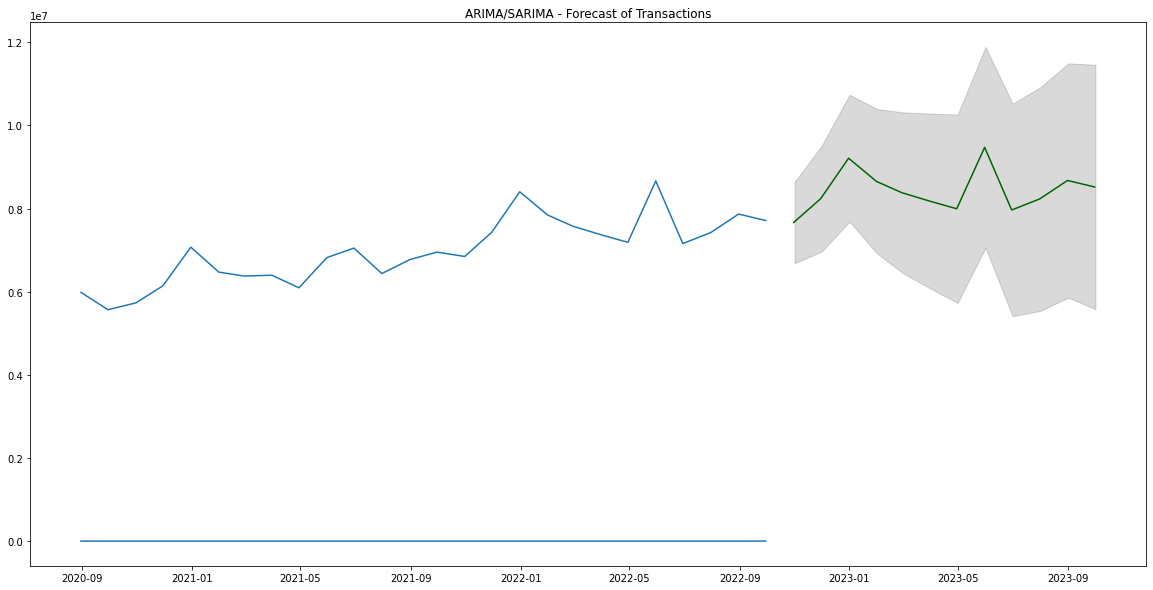

In [87]:
# forecasting for n periods
# n = 12

forecast(SARIMAX_model)

# SUM AUTO-ARIMA w/ train-test split

In [88]:
df[:1]

,total,month_index
Month,,
2020-08-31,5983120.0,8


In [89]:
test_size = 0.8

train_rows = round(len(df) * test_size)
test_rows =  len(df) - train_rows

train_rows, test_rows

(21, 5)

In [90]:
train = pd.DataFrame({"total" : df["total"][:train_rows].values,
                      'Month' : df["total"][:train_rows].index})
train = train.set_index('Month')
train.shape

(21, 1)

In [91]:
test = pd.DataFrame({"total" : df["total"][train_rows:].values,
                      'Month' : df["total"][train_rows:].index})
test = test.set_index('Month')
test.shape

(5, 1)

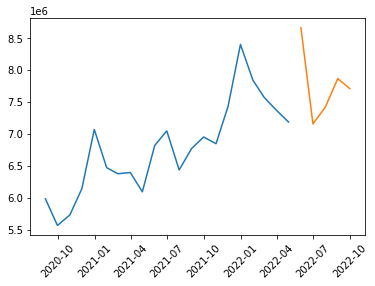

In [92]:
plt.plot(train)
plt.plot(test)
plt.xticks(rotation=45)
plt.show()

## SUM SARIMAX train

In [93]:
# to forecast multiple timesteps into the future
# we need to include the months as an exogenous variable to be forecasted as well

train['month_index'] = train.index.month
test['month_index'] = test.index.month

In [94]:
# SARIMAX model setup
# working with test_size = 0.8
# not working with test_size =0.7

SARIMAX2_model = auto_arima(train[['total']], 
                           exogenous=train[['month_index']],
                           start_p=1, 
                           start_q=1,
                           test='adf',
                           max_p=3, max_q=3, 
                           m=12,
                           start_P=0, 
                           seasonal=True,
                           d=None, 
                           D=1, 
                           trace=False,
                           error_action='warn',  
                           suppress_warnings=True, 
                           stepwise=True)

In [95]:
# SARIMAX model summary

SARIMAX2_model.summary()

# for SUM p-value < 0.05 => significant

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   21
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -118.951
Date:                            Tue, 22 Nov 2022   AIC                            243.902
Time:                                    11:20:29   BIC                            244.493
Sample:                                08-31-2020   HQIC                           242.625
                                     - 04-30-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.361e+06   1.12e+05     12.160      0.000    1.14e+06    1.58e+06
ar.L1         -0.0955      0.083     -1.153      0.249      -0.258       0.067
sigma2      1.884e+10      0.193   9.78e+10      0.000    1.88e+10    1.88e+10
===================================================================================
Ljung-Box (L1) (Q):                   1.60   Jarque-Bera (JB):                 0.87
Prob(Q):                              0.21   Prob(JB):                         0.65
Heteroskedasticity (H):               4.36   Skew:                            -0.62
Prob(H) (two-sided):                  0.26   Kurtosis:                         2.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.81e+27. Standard errors may be unstable.
"""

## SUM SARIMAX test performance

In [96]:
# forecasting for n periods
# adding month_index for forecast_df
# adding train and test splits into function
# periods = 5 as 5 months in test split

def sarimax_forecast_train(SARIMAX_model, train, test, periods=test_rows):

    # forecast
    n_periods = periods

    df = train.copy(deep=True) # taking only train part same df name
                               # to fasten code reproduction

    forecast_df = pd.DataFrame({"month_index":pd.date_range(df.index[-1], periods = n_periods, freq='MS').month},
                    index = pd.date_range(df.index[-1] + pd.DateOffset(months=1), periods = n_periods, freq='MS'))

    fitted, confint = SARIMAX_model.predict(n_periods=n_periods, 
                                            return_conf_int=True,
                                            exogenous=forecast_df[['month_index']])
    index_of_fc = pd.date_range(df.index[-1] + pd.DateOffset(months=1), periods = n_periods, freq='MS')

    # make series for plotting purpose
    #fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(20,10))
    plt.plot(df["total"], color='#1f76b4')
    plt.plot(fitted, color='darkgreen')
    plt.plot(test, color='#1f76b4')
    plt.fill_between(lower_series.index, 
                    lower_series, 
                    upper_series, 
                    color='k', alpha=.15)

    plt.title("SARIMAX - Forecast of Transactions")
    plt.show()

    # error
    results = pd.DataFrame({'historical' : test['total'].values,
                            'prediction' : fitted.values})
    print(results)
    rmse = sqrt(sklearn.metrics.mean_squared_error(results['historical'].values, results['prediction'].values))
    print('Test RMSE: %.3f' % rmse)

In [97]:
# predict

SARIMAX2_model.predict(n_periods=test_rows)

2022-05-31    8.076404e+06
2022-06-30    8.289353e+06
2022-07-31    7.678548e+06
2022-08-31    8.013311e+06
2022-09-30    8.193873e+06
Freq: M, dtype: float64

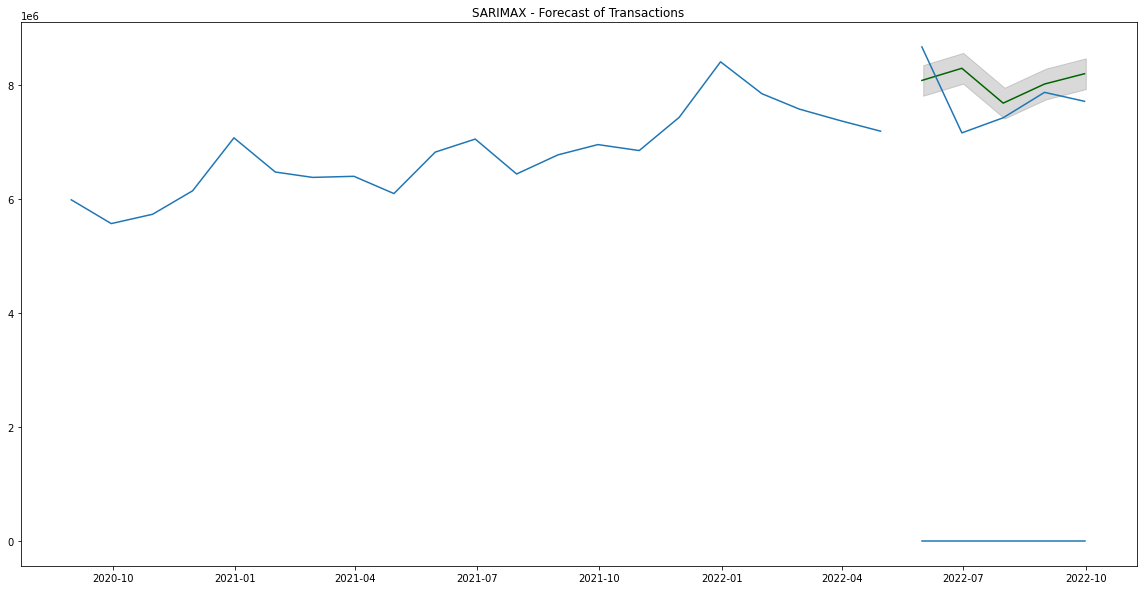

   historical    prediction
0   8664142.0  8.076404e+06
1   7156954.0  8.289353e+06
2   7421947.0  7.678548e+06
3   7867331.0  8.013311e+06
4   7710690.0  8.193873e+06
Test RMSE: 624240.969


In [98]:
# comparing actual test vs predict

sarimax_forecast_train(SARIMAX2_model, train, test, periods=test_rows)

# Prediction on 12 months

In [99]:
# SARIMAX model setup
# full df monthly datanpoints

SARIMAX_model_prediction = auto_arima(df[['total']], exogenous=df[['month_index']],
                           start_p=1, 
                           max_p=3,
                           start_q=1, 
                           max_q=3,
                           d=None,
                           max_d=2,
                           start_P=1,
                           max_P=2,
                           start_Q=1,
                           max_Q=2,
                           D=1,
                           max_D=2,
                           m=12,  
                           seasonal=True,
                           test='adf',
                           trace=False,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

In [100]:
SARIMAX_model_prediction.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   26
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -190.477
Date:                            Tue, 22 Nov 2022   AIC                            384.954
Time:                                    11:20:35   BIC                            386.084
Sample:                                08-31-2020   HQIC                           384.722
                                     - 09-30-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1695      0.097     -1.756      0.079      -0.359       0.020
sigma2      2.498e+11   9.06e-14   2.76e+24      0.000     2.5e+11     2.5e+11
===================================================================================
Ljung-Box (L1) (Q):                   4.28   Jarque-Bera (JB):                 6.61
Prob(Q):                              0.04   Prob(JB):                         0.04
Heteroskedasticity (H):              17.31   Skew:                            -1.28
Prob(H) (two-sided):                  0.02   Kurtosis:                         5.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.25e+39. Standard errors may be unstable.
"""

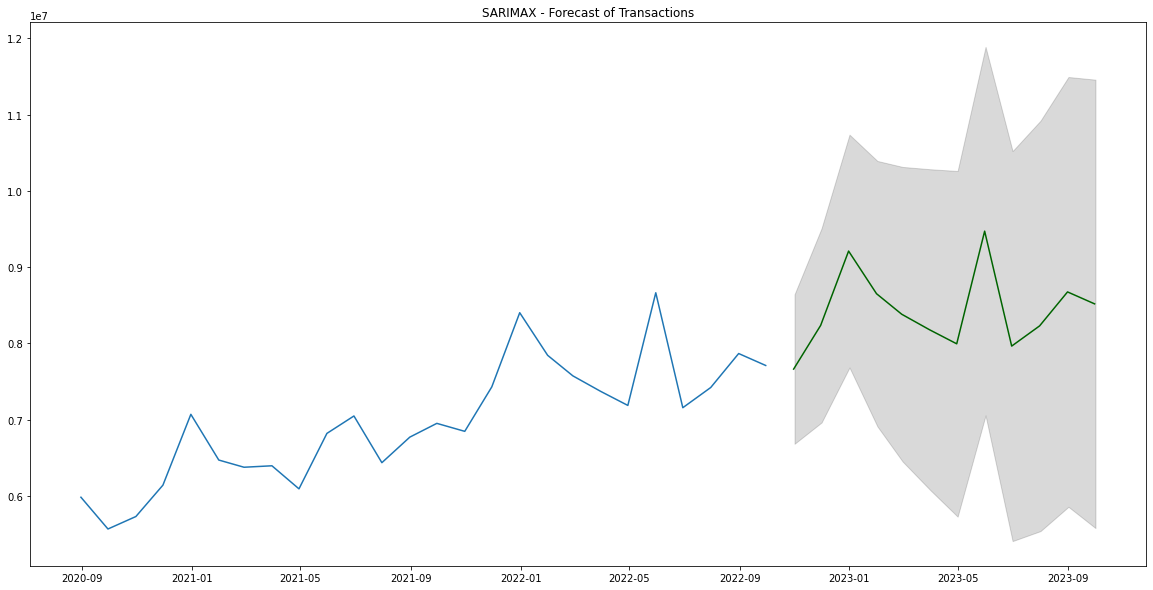

In [101]:
sarimax_forecast(SARIMAX_model_prediction, periods=12)